<a href="https://colab.research.google.com/github/lmgrj/Page-Rank/blob/main/Page_Rank_Lamgarraj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Master Informatique Specialités EID2 (DD avec WISD)</h1></center>


---


<center><h2>Web Mining</h2></center>


---
<center><h2>Page Rank</h2></center>


---
<center><h2>By : Lamgarraj Mohamed</h2></center>



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 **chemin de fichier graph.xml**

In [ ]:
fil = "/content/drive/MyDrive/WeBMining/graph.xml"

La classe pour lire le fichier XML,construire un liste des noudes et des relations , et calculer le page rank

In [ ]:
import numpy as np
from xml.dom import minidom

class PageRank():
    def __init__(self, path):
        graphml = minidom.parse(path)
        self.__nodes = [node.attributes['id'].value for node in graphml.getElementsByTagName('node')]
        self.__edges = [(edge.attributes['source'].value, edge.attributes['target'].value) 
                        for edge in graphml.getElementsByTagName('edge')]
        self.__pagerank = np.zeros(len(self.__nodes))
       
    def AMatrix(self):
        """
        This function calculates this adjacency matrix, A, of a graph.
        @return A
        """
        A = []
        for node in self.__nodes:
            A.append([1 if (node, n) in self.__edges else 0 for n in self.__nodes])
        return np.array(A)
        
    def getpagerank(self, e = 0.85, eps = 0.001):
        """
        Calculating of probabilities matrix P and the PageRank(PR) of the nodes(pages)
        @parameters:
            e:   is the probability of the random surfer clicks on one of the hyperlinks (equals 0.85 by default)
            eps: The stopping condition that equals 0.001 by default
        @return [] (last vector in the R matrix witch containes the PR of each node)
        """
        A = self.AMatrix()
        N = len(A)
        P = []
        for a in A:
            if sum(a) == 0: P.append([1/N for i in A])
            else: P.append([e*i/sum(a) + ((1-e)/N) for i in a])
        P = np.array(P)

        R = np.array([[1/N for a in A]])
        l = 0
        while True:
            R = np.append(R, [R[l].dot(P)], axis=0)
            l += 1
            if np.linalg.norm(R[l] - R[l-1]) <= eps:
                break
        self.__pagerank = R[l]
        return R[l]
    
    def getall(self):
        """
        This function return a list of tuples that containes, for each one, the node (the page) and his rank percent
        """
        return [(n, round(r*100, 2)) for n,r in zip(self.__nodes, self.__pagerank)]

construire une liste des points de départ et points d'arriver 

In [ ]:
def getg(path):
        graphml = minidom.parse(path)
        nodes = [node.attributes['id'].value for node in graphml.getElementsByTagName('node')]
        edges = [(edge.attributes['source'].value, edge.attributes['target'].value) 
                        for edge in graphml.getElementsByTagName('edge')]
        return edges


In [ ]:
Gr=getg(fil)

In [ ]:
Gr

[('P1', 'p5'),
 ('P2', 'P5'),
 ('P3', 'P5'),
 ('P4', 'P5'),
 ('P12', 'P5'),
 ('P6', 'P5'),
 ('P7', 'P5'),
 ('P8', 'P5'),
 ('P9', 'P12'),
 ('P10', 'P12'),
 ('P13', 'P12'),
 ('P14', 'P12'),
 ('P17', 'P12'),
 ('P18', 'P12'),
 ('P20', 'P15'),
 ('P1', 'P15'),
 ('P2', 'P15'),
 ('P5', 'P15'),
 ('P10', 'P1'),
 ('P6', 'P1'),
 ('P7', 'P3'),
 ('P8', 'P16'),
 ('P9', 'P16'),
 ('P10', 'P16'),
 ('P11', 'P16'),
 ('P12', 'P2'),
 ('P13', 'P2'),
 ('P14', 'P2'),
 ('P15', 'P8'),
 ('P16', 'P8'),
 ('P18', 'P17'),
 ('P19', 'P17'),
 ('P20', 'P17'),
 ('P1', 'P17'),
 ('P2', 'P17'),
 ('P3', 'P19'),
 ('P4', 'P19'),
 ('P5', 'P19'),
 ('P6', 'P19'),
 ('P7', 'P10'),
 ('P8', 'P10')]

Visualiser le graphe 

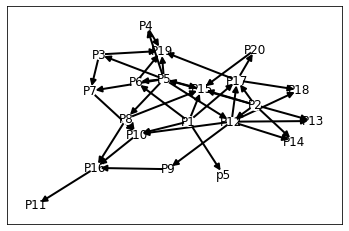

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(Gr)


options = {
    'node_color': 'white',
    'node_size': 100,
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}

nx.draw_networkx(G, arrows=True, **options)
plt.show()

calculer le page rank pour tout les 20 pages

In [ ]:
pr= PageRank(fil)
pagerank = pr.getpagerank(e = 0.85, eps = 0.001)
print(pagerank)
print()
print(pr.getall())

[0.0249473  0.06778751 0.009625   0.0075     0.13632784 0.0075
 0.0075     0.15617056 0.0075     0.05381952 0.0075     0.12678869
 0.0075     0.0075     0.09844587 0.07657932 0.10708486 0.0075
 0.07492353 0.0075    ]

[('P1', 2.49), ('P2', 6.78), ('P3', 0.96), ('P4', 0.75), ('P5', 13.63), ('P6', 0.75), ('P7', 0.75), ('P8', 15.62), ('P9', 0.75), ('P10', 5.38), ('P11', 0.75), ('P12', 12.68), ('P13', 0.75), ('P14', 0.75), ('P15', 9.84), ('P16', 7.66), ('P17', 10.71), ('P18', 0.75), ('P19', 7.49), ('P20', 0.75)]


In [ ]:
from prettytable import PrettyTable

pt = PrettyTable()
pt.field_names = ['Nodes','Rank percent']
for item in sorted(pr.getall()): pt.add_row([item[0], f"{item[1]} %"])
print(pt)

+-------+--------------+
| Nodes | Rank percent |
+-------+--------------+
|   P1  |    2.49 %    |
|   P2  |    6.78 %    |
|   P3  |    0.96 %    |
|   P4  |    0.75 %    |
|   P5  |   13.63 %    |
|   P6  |    0.75 %    |
|   P7  |    0.75 %    |
|   P8  |   15.62 %    |
|   P9  |    0.75 %    |
|  P10  |    5.38 %    |
|  P11  |    0.75 %    |
|  P12  |   12.68 %    |
|  P13  |    0.75 %    |
|  P14  |    0.75 %    |
|  P15  |    9.84 %    |
|  P16  |    7.66 %    |
|  P17  |   10.71 %    |
|  P18  |    0.75 %    |
|  P19  |    7.49 %    |
|  P20  |    0.75 %    |
+-------+--------------+


transphormer les résultats en pandads dataframe pour la visualisation

In [ ]:
import pandas as pd
x=pd.DataFrame(pr.getall())
sorted(x[1],reverse=True)

[15.62,
 13.63,
 12.68,
 10.71,
 9.84,
 7.66,
 7.49,
 6.78,
 5.38,
 2.49,
 0.96,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75]

visualiser les pages rank : les y = page rank , les x= les pages web

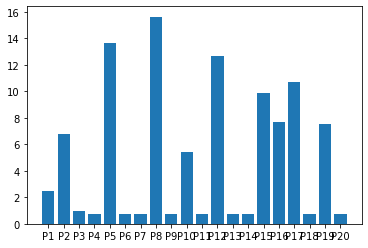

In [ ]:
import matplotlib.pyplot as plt


plt.bar(x[0],np.absolute(x[1]))
plt.show()

<h3> LAMGARRAJ Mohamed</h3>

---


USMBA_FSDM_FES ---> Master: Web Intelligence and Data Science(WISD)



---



USPN_Paris ---> Master: Exploration Informatique des Données et Décisionnel(EID2)



---



linkedin: https://www.linkedin.com/in/mohamed-lamgarraj-61b3341a3/

kaggle: https://www.kaggle.com/mohamedlamgarraj

github: https://github.com/lmgrj